# 1. Decision Tree

### 1.1 Entropy, Gini, Information Gain

- 두 metrix 모두 복잡도가 높을 때(uniform distribution) 1, 복잡도가 낮을 때(deterministic) 0 이다.

### 1.2 사이킷런을 사용한 Decision Tree 학습

- 핸즈 온 머신러닝 p.229 ~
- [참고자료](https://nbviewer.jupyter.org/github/rickiepark/handson-ml2/blob/master/06_decision_trees.ipynb)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

In [ ]:
iris.feature_names[2:] # 꽃잎의 길이와 너비

['petal length (cm)', 'petal width (cm)']

In [ ]:
print("[길이, 너비] , class")
print(X[0], y[0])
print(X[50], y[50])
print(X[100], y[100])

[길이, 너비] , class
[1.4 0.2] 0
[4.7 1.4] 1
[6.  2.5] 2


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

[Appendix#1] 결정트리.pdf p.12
- Entropy

In [ ]:
################## Fill Your Code! ##################
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree_clf_entropy.fit(X, y)
#####################################################

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Appendix#1] 결정트리.pdf p.14
- Gini

In [ ]:
################## Fill Your Code! ##################
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)
tree_clf_gini.fit(X, y)
#####################################################

DecisionTreeClassifier(max_depth=2)

결정 트리 시각화는 export_graphviz라는 라이브러리를 사용한다.

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf_entropy,
    out_file='iris_tree_entropy.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

export_graphviz(
    tree_clf_gini,
    out_file='iris_tree_gini.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [ ]:
!dot -Tpng iris_tree_entropy.dot -o iris_tree_entropy.png
!dot -Tpng iris_tree_gini.dot -o iris_tree_gini.png

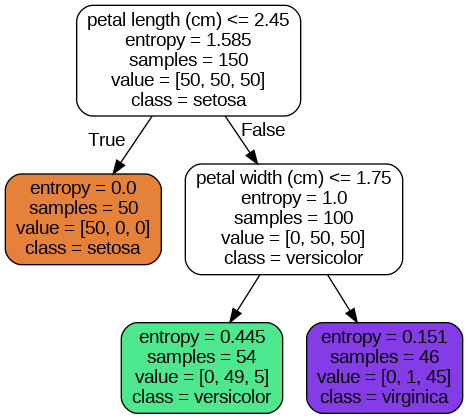

In [ ]:
# https://stackoverflow.com/questions/49478791/how-can-i-open-images-in-a-google-colaboratory-notebook-cell-from-uploaded-png-f
from IPython.display import Image
Image('iris_tree_entropy.png')

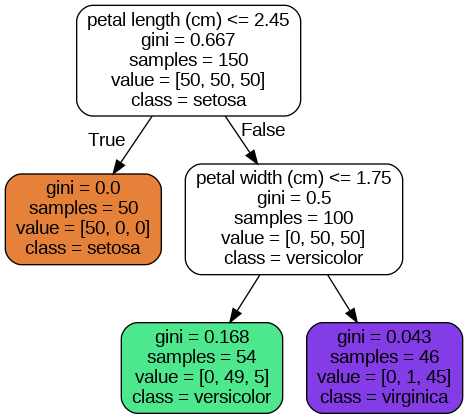

In [ ]:
Image('iris_tree_gini.png')

- 이번에는 tree의 max depth를 바꾸어 보자

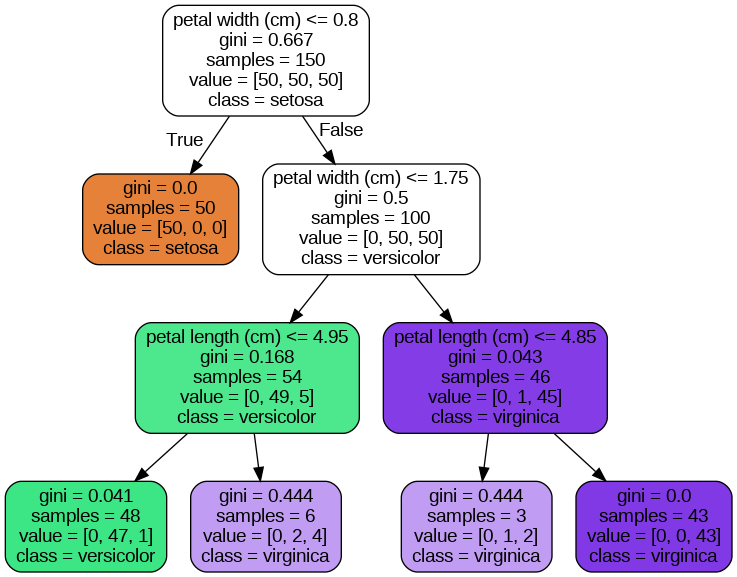

In [ ]:
################## Fill Your Code! ##################
tree_clf_md3 = DecisionTreeClassifier(max_depth=3)
tree_clf_md3.fit(X, y)
#####################################################

dot_data = export_graphviz(
    tree_clf_md3,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    out_file='iris_tree_md3.dot',
    rounded=True,
    filled=True
)

!dot -Tpng iris_tree_md3.dot -o iris_tree_md3.png
Image('iris_tree_md3.png')

- 이번에는 max depth를 설정하지 않고 decision tree를 만들어보자.

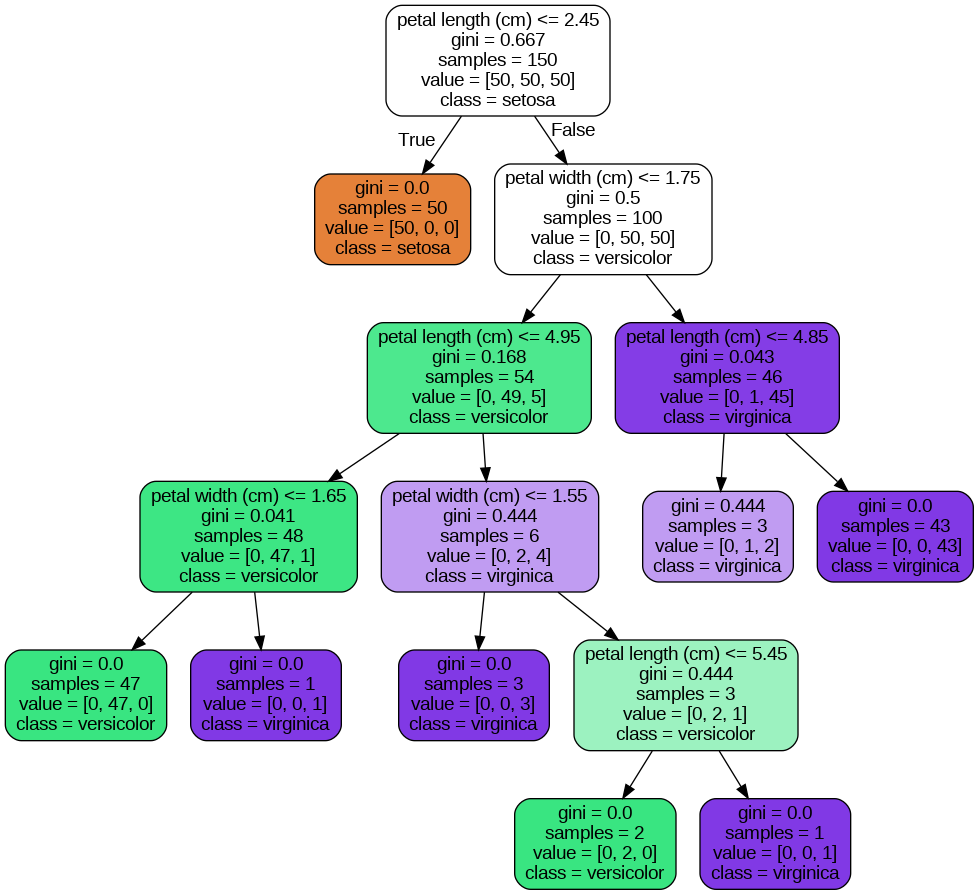

In [ ]:
################## Fill Your Code! ##################
tree_clf_free = DecisionTreeClassifier()
tree_clf_free.fit(X, y)
#####################################################

dot_data = export_graphviz(
    tree_clf_free,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    out_file='iris_tree_free.dot',
    rounded=True,
    filled=True
)

!dot -Tpng iris_tree_free.dot -o iris_tree_free.png
Image('iris_tree_free.png')

### 예측하기
핸즈 온 머신러닝 p.231 ~

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    ################## Fill Your Code! ##################
    ## predict 부분
    y_pred = clf.predict(X_new).reshape(x1.shape)
    #####################################################

    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

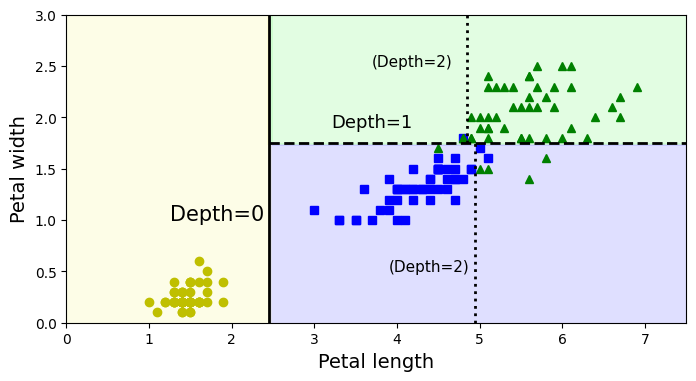

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_gini, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.25, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.90, "Depth=1", fontsize=13)
plt.text(3.7, 2.5, "(Depth=2)", fontsize=11)
plt.text(3.9, 0.5, "(Depth=2)", fontsize=11)

#save_fig("decision_tree_decision_boundaries_plot")
plt.show()

## 1.5 클래스 확률 추정

핸즈 온 머신러닝 p.234 ~

- Leaf node 탐색하여, 해당 class에 대한 sample 비율 반환.

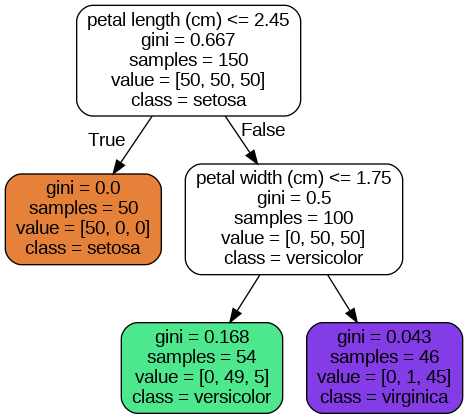

In [ ]:
Image('iris_tree_gini.png')

In [ ]:
# petal length : 5 cm, petal width : 1.5 cm
# [0, 49, 5] -> [0/54, 49/54, 5/54]
tree_clf_gini.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf_gini.predict([[5, 1.5]])

array([1])

## 1.6 규제 매개변수

핸즈 온 머신러닝 p.237 ~

- Decision tree는 훈련 데이터에 대한 제약 사항이 거의 없다.

- 제약을 두지 않은 상태로 훈련을 진행하면 데이터에 over fitting될 수 있다.

- 이를 피하기 위해 decision tree의 아래와 같은 파라미터에 제한을 둔다.
 - 최대 깊이
 - 최소 노드 개수

In [ ]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.1, random_state=2023)

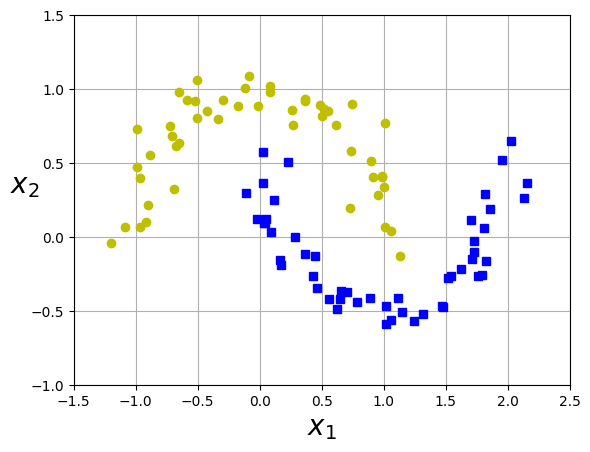

In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(Xm, ym, [-1.5, 2.5, -1, 1.5])
plt.show()

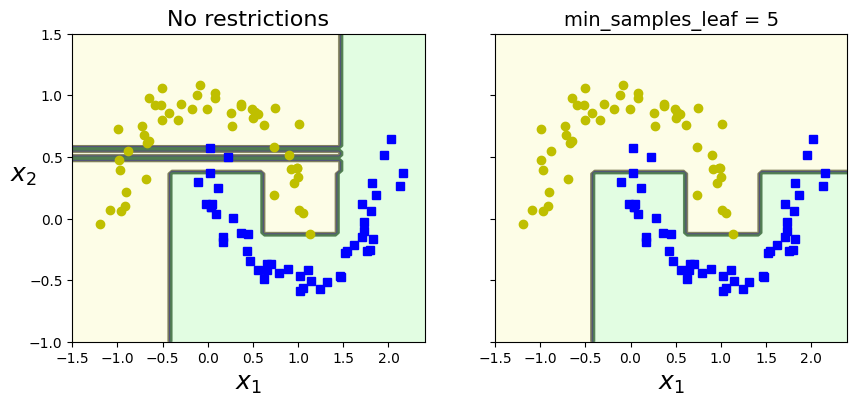

In [ ]:
################## Fill Your Code! ##################
deep_tree_clf1 = DecisionTreeClassifier(random_state=2023)
# min_samples_leaf 리프 노드가 가지고 있어야 할 최소 샘플 수
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=2023)
#####################################################
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

#save_fig("min_samples_leaf_plot")
plt.show()

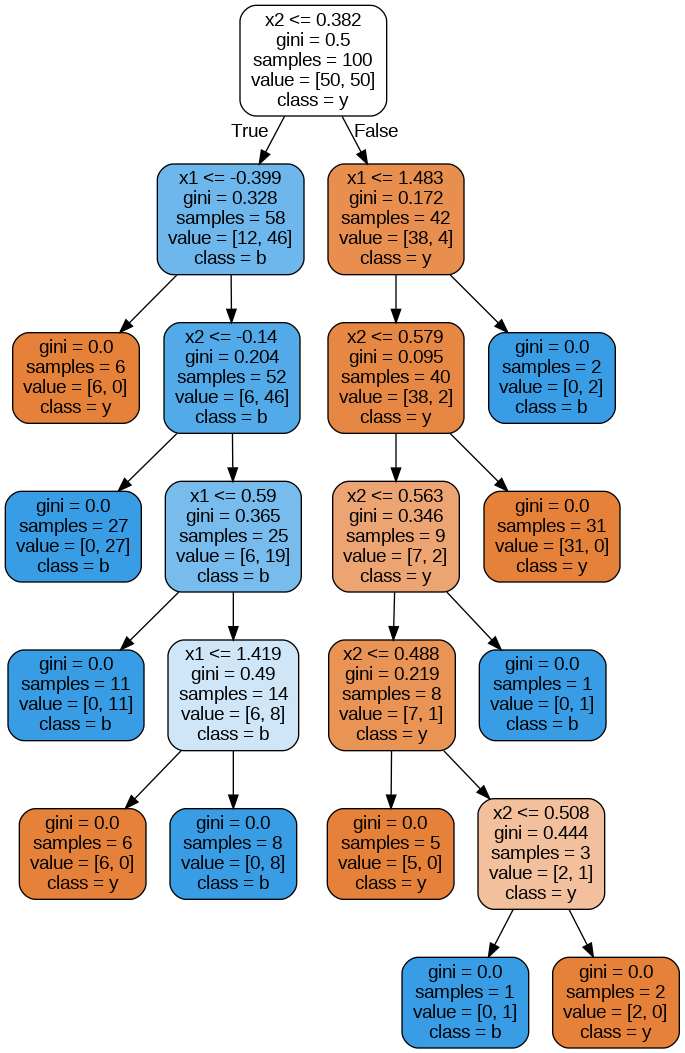

In [ ]:
export_graphviz(
    deep_tree_clf1,
    out_file='deep_tree_clf1.dot',
    feature_names=['x1', 'x2'],
    class_names=['y', 'b'],
    rounded=True,
    filled=True
)

!dot -Tpng deep_tree_clf1.dot -o deep_tree_clf1.png
Image('deep_tree_clf1.png')

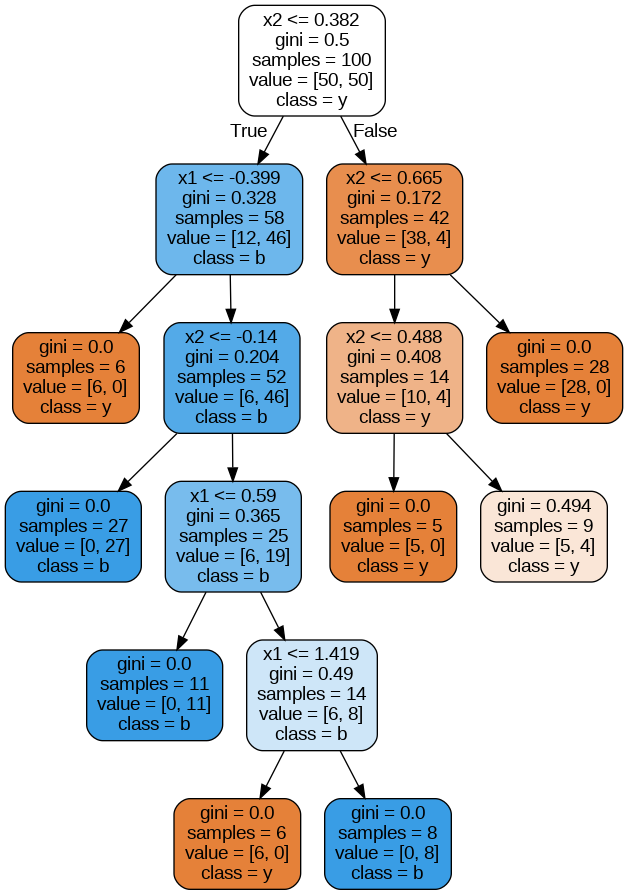

In [ ]:
export_graphviz(
    deep_tree_clf2,
    out_file='deep_tree_clf2.dot',
    feature_names=['x1', 'x2'],
    class_names=['y', 'b'],
    rounded=True,
    filled=True
)

!dot -Tpng deep_tree_clf2.dot -o deep_tree_clf2.png
Image('deep_tree_clf2.png')

## 1.7 회귀
핸즈 온 머신러닝 p.239 ~

In [ ]:
# 잡음이 섞인 2차 함수 형태의 데이터셋
np.random.seed(2023)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

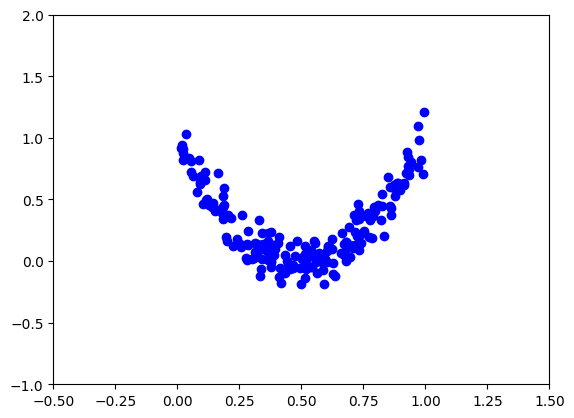

In [ ]:
plt.plot(X, y, "bo")
plt.axis([-0.5, 1.5, -1, 2])
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

################## Fill Your Code! ##################
tree_reg = DecisionTreeRegressor(max_depth = 2) # 0, 1, 2
tree_reg.fit(X, y)
#####################################################

DecisionTreeRegressor(max_depth=2)

In [ ]:
export_graphviz(
    tree_reg,
    out_file='regression_tree.dot',
    feature_names=["x1"],
    rounded=True,
    filled=True
)

In [ ]:
!dot -Tpng regression_tree.dot -o regression_tree.png

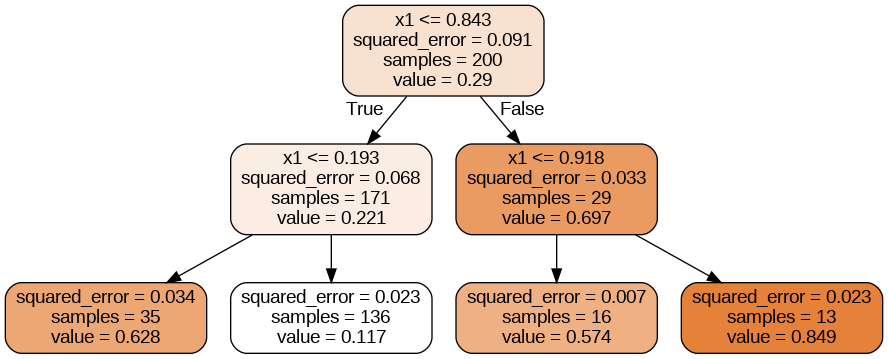

In [ ]:
Image('regression_tree.png')

- 각 node에서 class 예측 대신 **값을 예측**

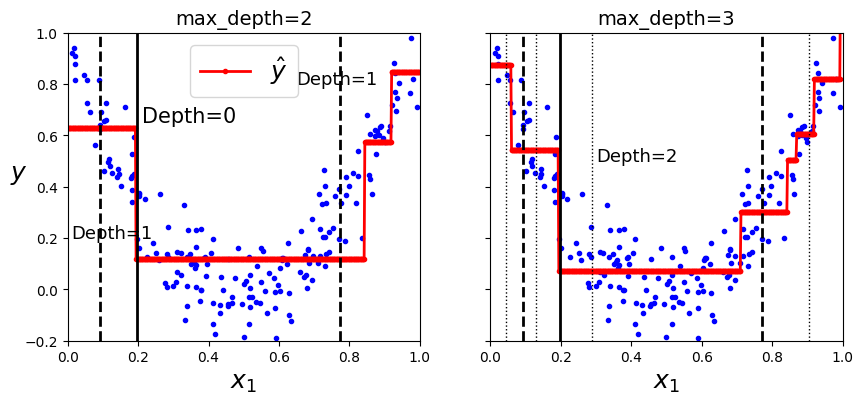

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=2023, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=2023, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

#save_fig("tree_regression_plot")
plt.show()

- 각 영역의 예측값은 항상 그 영역에 있는 target 값의 평균이 됨

#### 1.7.1 Decision tree 회귀 모델 규제

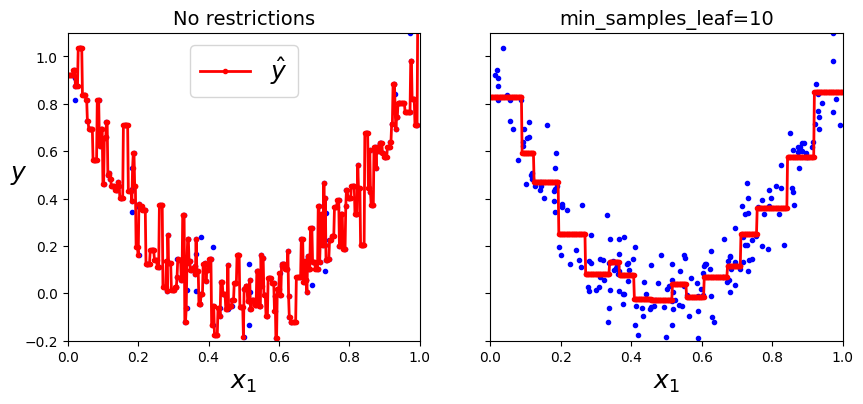

In [ ]:
################## Fill Your Code! ##################
tree_reg1 = DecisionTreeRegressor(random_state=2023)
tree_reg2 = DecisionTreeRegressor(random_state=2023, min_samples_leaf=10)
#####################################################
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

#save_fig("tree_regression_regularization_plot")
plt.show()

## 1.8 불안정성

핸즈 온 머신러닝 p.241 ~

- Decision tree는 데이터에 따라서 생성되는 **결정 경계**가 다르다.
- 이는 decision tree 학습에 있어 데이터가 중요하다는 것을 의미한다.

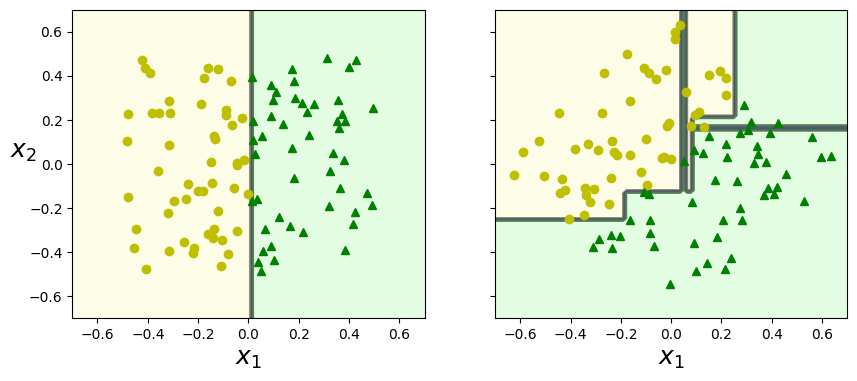

In [ ]:
np.random.seed(2023)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

#save_fig("sensitivity_to_rotation_plot")
plt.show()

In [ ]:
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

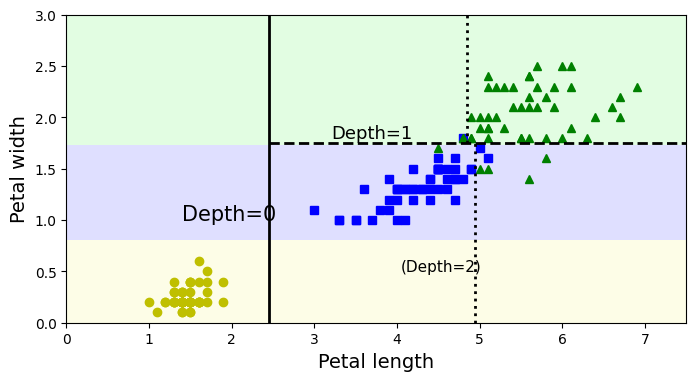

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

#save_fig("decision_tree_decision_boundaries_plot")
plt.show()

훈련 데이터에 있는 작은 변화에도 매우 민감

훈련 세트에서 꽃잎 너비가 가장 넓은 Iris-Versicolor sample 하나 제거하고 훈련

(꽃잎 길이가 4.8cm, 꽃잎 너비가 1.8cm)

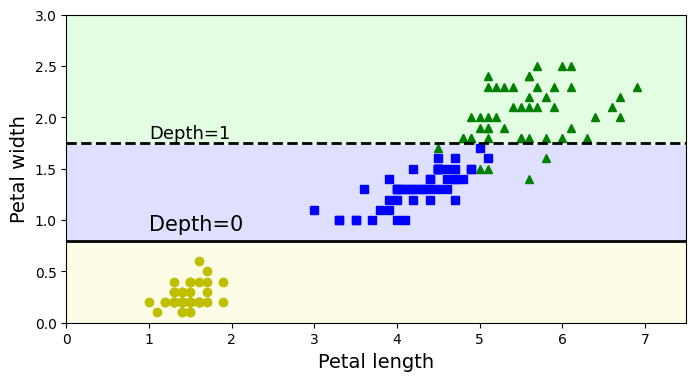

In [ ]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

#save_fig("decision_tree_instability_plot")
plt.show()

# 2. Random Forest


[코드 참조](https://nbviewer.jupyter.org/github/rickiepark/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb)

### 2.0 앙상블(Ensemble)

- 어떤 데이터로부터 여러 개의 분류기를 학습시킨다.


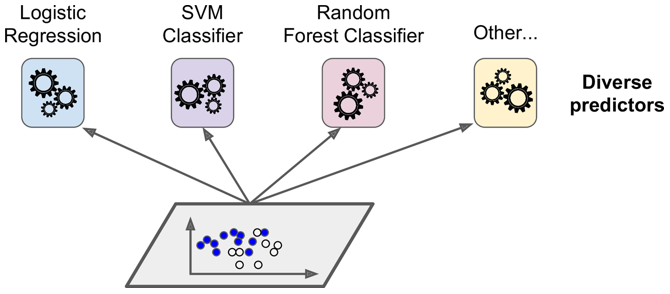

- 학습된 여러 분류기를 사용하여 어떤 데이터를 분류한다고 할 때, **가장 많이 투표를 받은 클래스**가 앙상블 예측의 결과가 된다.

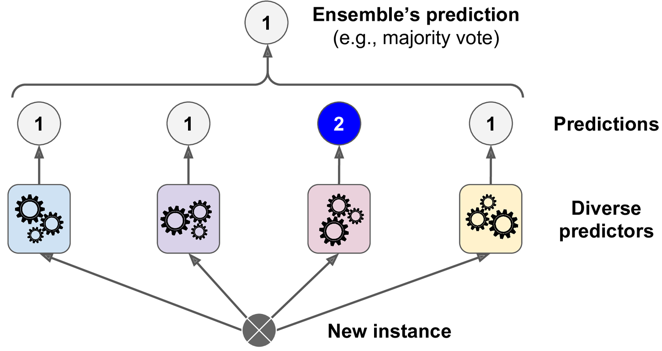

- 이와 같은 구조(여러개의 독립된 분류기)의 예측기를 **앙상블**이라 부른다.

### 2.1 Random Forest

핸즈 온 머신러닝 p.254 ~

- **Decision Tree로만 앙상블**이 구성된 구조.
- **앙상블의 학습은 2가지 방법**이 있다.
 - **배깅(Bagging)** : 훈련 데이터에서 중복을 허락하여 학습
 - **페이스팅(Pasting)** : 훈련 데이터의 중복을 허락하지 않고 학습

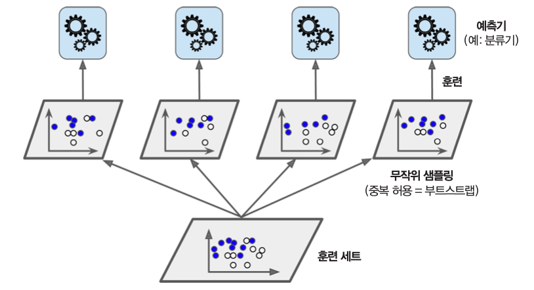

- **Random forest는 배깅 방법을 적용한 decision tree의 앙상블이다.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=2023)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023)

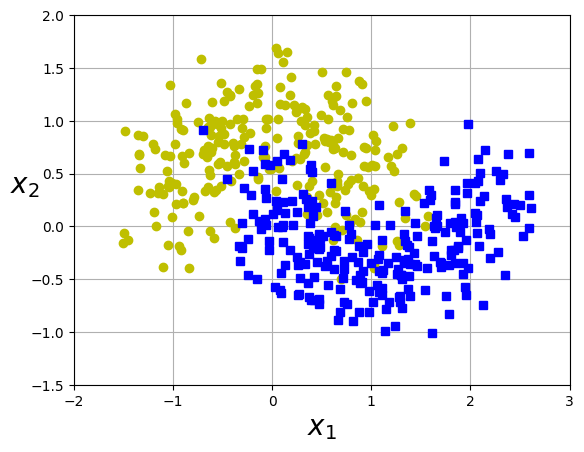

In [ ]:
plot_dataset(X, y, [-2, 3, -1.5, 2])
plt.show()

**DecisionTreeClassifier**

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=2023)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_tree))

0.824


**RandomForestClassifier**

 - n_estimators : 분류기(tree) 개수

 - max_leaf_nodes : 최대 leaf node 개수 [규제]

 - n_jobs : 사용할 CPU 코어 개수 (-1은 모두 사용)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

################## Fill Your Code! ##################
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
#####################################################
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_rf))

0.84


In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-2, 3, -1.5, 2], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

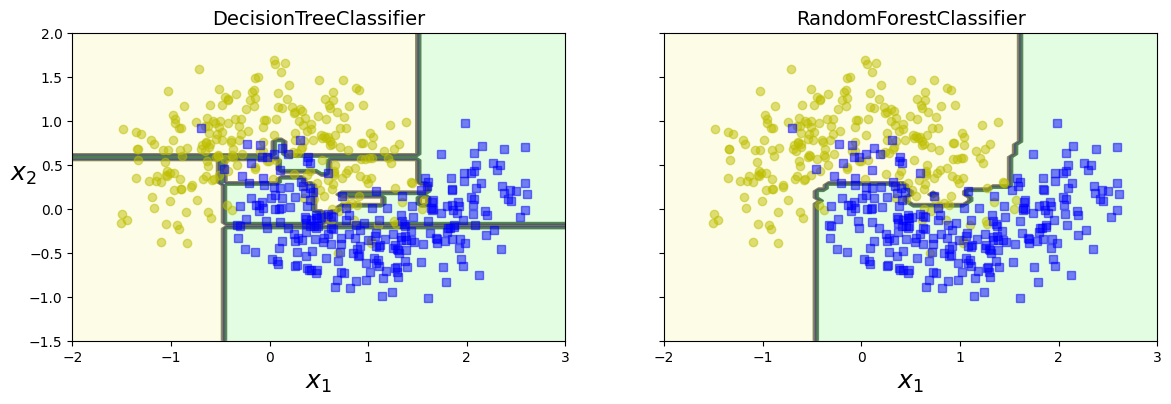

In [ ]:
fix, axes = plt.subplots(ncols=2, figsize=(14,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("DecisionTreeClassifier", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(rnd_clf, X, y)
plt.title("RandomForestClassifier", fontsize=14)
plt.ylabel("")
#save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

### 2.2 부스팅(Boosting)

핸즈 온 머신러닝 p.257 ~

부스팅은 성능이 약한 모델을 여러 개 연결(직렬)하여 강한 모델을 만드는 앙상블 기법을 말한다.

부스팅은 앞의 모델의 약한 부분을 보완해가며 모델을 학습하는 것이다.

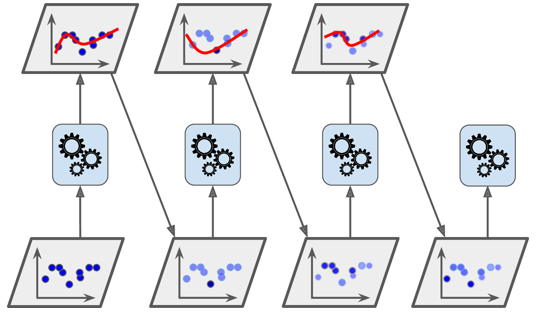

- 부스팅 기법으로는 아래 **2개의 방법**이 있다.
 - **AdaBoost(Adaptive Boosting)**
 - **Gradient Boosting**

### 2.3 에이다부스트 (AdaBoost)

핸즈 온 머신러닝 p.258 ~

에이다 부스트는 아래와 같은 방법으로 학습이 진행된다.

1) 훈련된 모델이 잘못 분류한 sample에 가중치 부여

2) 다음 모델은 그 전 모델로부터 가중치가 부여된 sample 위주로 훈련

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

In [ ]:
# Decision Tree
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

# Boosting
y_pred_tree = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.832
0.856


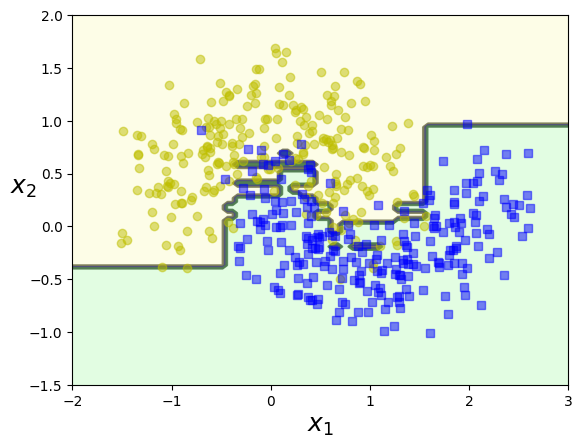

In [ ]:
plot_decision_boundary(ada_clf, X, y)

### 2.4 그레이디언트 부스팅 (Gradient Boosting)

핸즈 온 머신러닝 p.262 ~

그레디언트 부스팅 방법은 이전 예측기가 만든 잔여 오차를 새로운 분류기로 학습을 하는 것이다.



In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

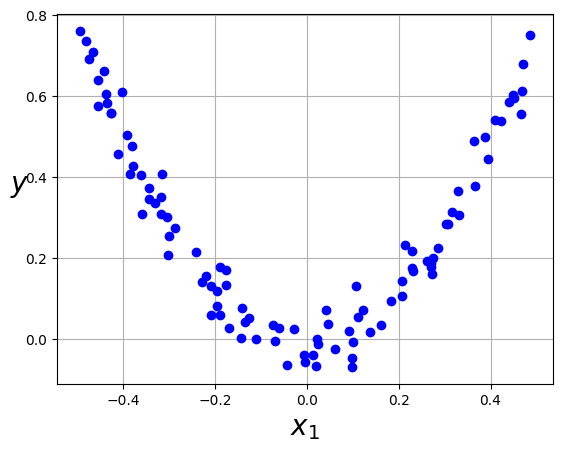

In [ ]:
plt.plot(X, y, "bo")
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$y$", fontsize=20, rotation=0)
plt.show()

- 아래 예시를 통해 위 데이터가 학습되는 과정을 살펴보자

1) **첫번째 DecisionTreeRegressor**을 통해 **데이터를 학습**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=2023)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=2023)

2) 첫 번째 예측기에서 생긴 **잔여 오차**를 **두 번째 DecisionTreeRegressor로 학습**

In [ ]:
################## Fill Your Code! ##################
y2 = y - tree_reg1.predict(X)
#####################################################
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=2023)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=2023)

3) 두 번째 예측기에서 생긴 **잔여 오차**를 **세 번째 DecisionTreeRegressor로 학습**

In [ ]:
################## Fill Your Code! ##################
y3 = y2 - tree_reg2.predict(X)
#####################################################
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=2023)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=2023)

- 학습된 세개의 decision tree regressor를 사용하여 test data에 대한 성능을 확인해보자.

In [ ]:
X_test = np.random.rand(50, 1) - 0.5
y_test = 3*X_test[:, 0]**2 + 0.05 * np.random.randn(50)

In [ ]:
# y_pred를 만들기 위해서는 각 트리에서의 결과를 모두 더해준다.
################## Fill Your Code! ##################
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))
#####################################################

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

0.007798169544715141


- 이번에는 그림을 통해 그려진 regression 결과를 확인 해보자.

In [ ]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

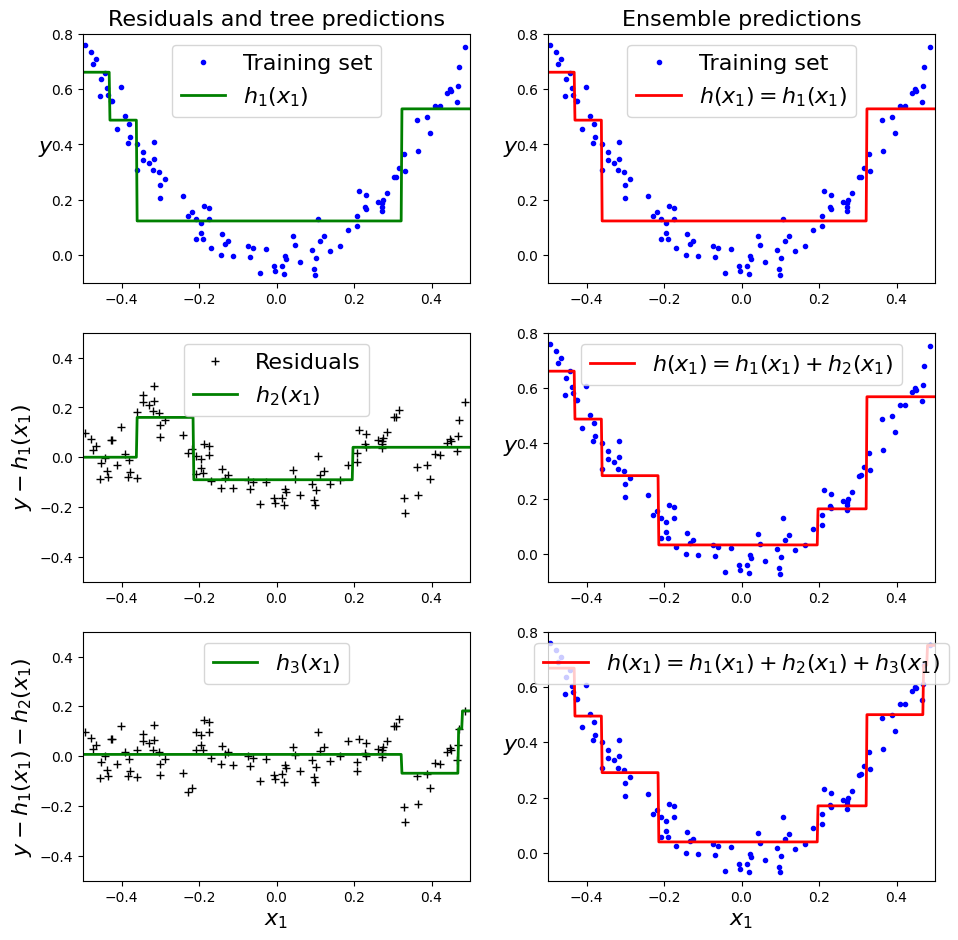

In [ ]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

#save_fig("gradient_boosting_plot")
plt.show()

- Scikit-learn을 사용한 GradientBoostingRegressor는 아래와 같이 사용한다.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=2023)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=2023)

In [ ]:
X_test = np.random.rand(50, 1) - 0.5
y_test = 3*X_test[:, 0]**2 + 0.05 * np.random.randn(50)
y_pred = gbrt.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print(MSE)

0.006130199395381255


## XGBoost(eXtreme Gradient Boosting)

핸즈 온 머신러닝 p.267 ~

- 마지막으로 살펴볼 boosting 방법은, XGBoost 이다.
- 이 방법은, 각 tree의 **학습에 전체 데이터를 사용하지 않고**, **주어진 비율의 데이터만 사용하여 학습하는** 방법이다.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
import xgboost
# https://stackoverflow.com/questions/58318685/how-to-hide-warnings-from-xgboost-library-in-jupyter
# subsample을 사용하여 각 tree에서 사용할 데이터의 비율을 정해줄 수 있다.
xgb_reg = xgboost.XGBRegressor(random_state=2023, subsample = 0.7, silent=True)
xgb_reg.fit(X, y)
y_pred = xgb_reg.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)
print("Validation MSE:", test_error)

Validation MSE: 0.00541015148036977


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


#3. Support Vector Machine

[코드 참조](https://nbviewer.jupyter.org/github/rickiepark/handson-ml2/blob/master/05_support_vector_machines.ipynb)

핸즈 온 머신러닝 p.205 ~

### 3.0 Support Vector Machine(SVM)

- **서포트벡터머신(SVM)**은 이전에 본 **선형/로지스틱 분류기의 확장**으로 생각할 수 있다.
- SVM과 선형/로지스틱 분류기의 차이는 **결정 경계(decision boundary) 양쪽으로 마진 영역**을 갖는다는 것이다.

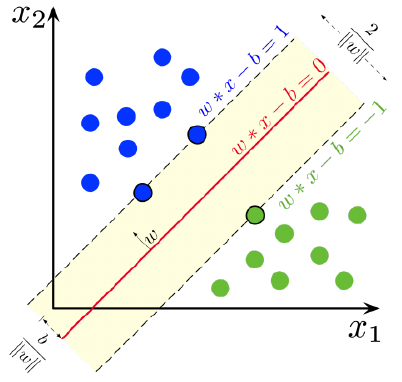

- SVM은 위에서 **마진의 영역을 최대화**하는 **최적화 문제**이다.

In [ ]:
#support vector는 결정경계 끝에 있는 동그라미

### 3.1 선형 SVM 분류


아래는 선형 SVM의 가장 기본적인 목적함수를 보여준다.

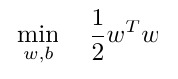

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
iris.feature_names[2:4]

['petal length (cm)', 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.svm import SVC
################## Fill Your Code! ##################
# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=1e10)
#####################################################
svm_clf.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

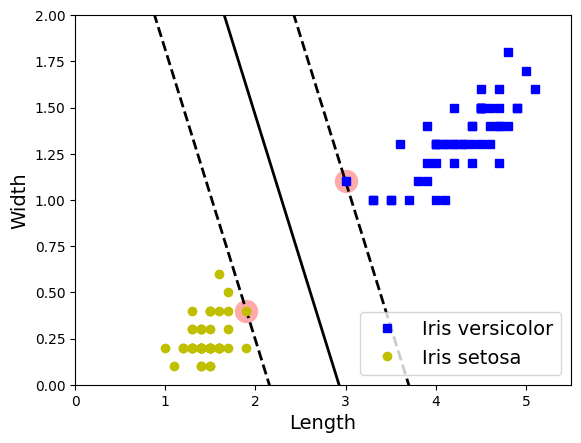

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=250, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Length", fontsize=14)
plt.ylabel("Width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

- **Support Vector** : Decision boundary 마진 위에 위치한 샘플
- 마진 밖에 있는 샘플은 decision boundary에 영향을 주지 않는다.
- 즉, **support vector에 의해서만 decision boundary가 결정된다.**

#### 3.1.1 하드 마진 분류(Hard Margin Classification)
- 모든 샘플이 마진 밖으로 분류된 경우를 말한다.


- 문제점
 - 데이터가 선형적으로 구분될 수 있어야 제대로 작동
 - 이상치에 민감

- 여전히 아래의 목적함수를 사용하고 있다.

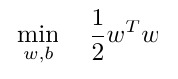

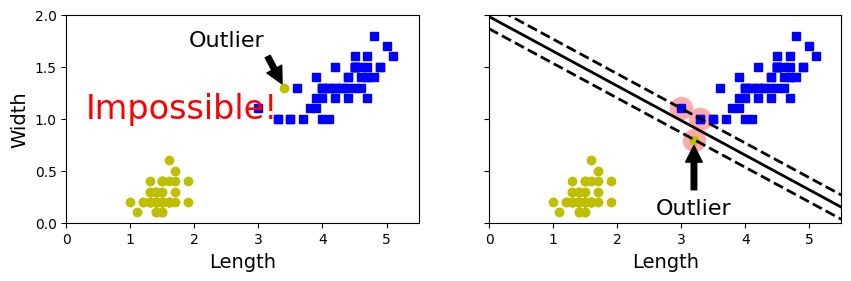

In [ ]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

################## Fill Your Code! ##################
svm_clf2 = SVC(kernel="linear", C=1e10)
#####################################################
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Length", fontsize=14)
plt.ylabel("Width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

#save_fig("sensitivity_to_outliers_plot")
plt.show()

#### 3.1.2 소프트 마진 분류(Soft Margin Classfication)
- 위와 같은 문제를 해결하기 위해서는 조금 더 유연한 모델이 필요하다.

 - 마진 폭을 최대한 넓게 유지.

 - Margin violation(sample이 도로 중간이나 반대쪽에 있는 경우 등) 사이에서 균형 잡기

- 소프트 마진 분류의 경우 아래의 목적함수로 바꾸어 최적화를 진행한다.


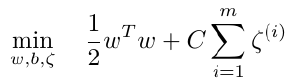

Constrained Optimization

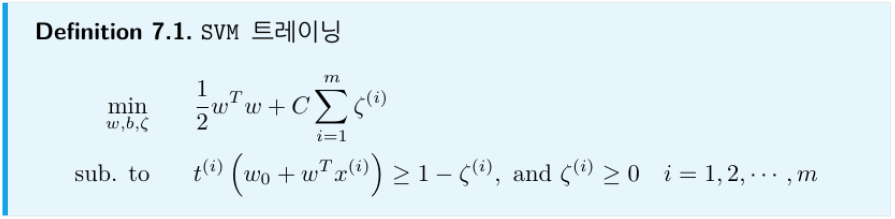

- 위에서 $ζ^{(i)}$는 slack variable이며, i번째 샘플이 마진을 넘어갈 수 있도록 도와준다.

- $C$는 **마진의 크기**와 **slack variable** 사이의 비율을 의미한다.

- $t^{(i)}=y^{(i)}$는 $i$번째 샘플의 label을 말한다. SVM 문제에서는 $+1$또는 $-1$ 값이 된다.

- $t^{(i)}(w_0 + w^T x^{(i)}) = t^{(i)} \hat{t}$$^{(i)} = y^{(i)} \hat{y}$$^{(i)}$로 생각할 수 있다.

In [ ]:
#ζ(i) >= 1-t(i)t^ (i)

Augmented 목적함수

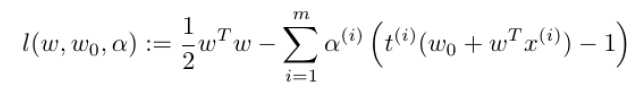

Stationary point 조건

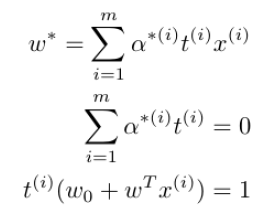

최종적인 form

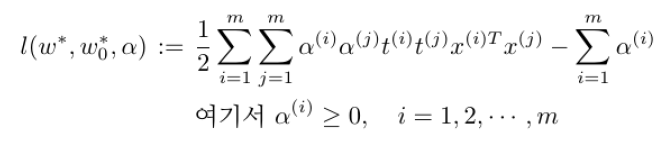

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

In [ ]:
scaler = StandardScaler()
################## Fill Your Code! ##################
svm_clf1 = LinearSVC(C=1, random_state=2023)
svm_clf2 = LinearSVC(C=100, random_state=2023)
#####################################################

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=100, random_state=2023))])

In [ ]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(4.0, 5.9, 0.8, 2.8)

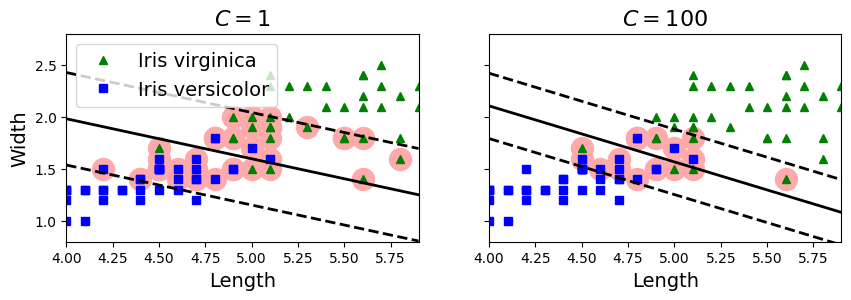

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Length", fontsize=14)
plt.ylabel("Width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

#save_fig("regularization_plot")

- 위와 같이 C의 값에 따라 margin의 영역이 바뀌는 것을 볼 수 있다.

- C가 작으면, decision boundary에 대한 위반을 적게 반영하므로, 마진이 넓에지게 된다.

- C가 크면, decision boundary에 대한 위반을 크게 반영하므로, 마진이 좁아지게 된다.

### 3.2 비선형 SVM 분류

핸즈 온 머신러닝 p.209 ~

- SVM의 경우 선형 데이터에 대해서는 굉장히 좋은 성능을 보인다.
- 하지만, 비선형 데이터는 단순하게 SVM을 사용해서는 해결할 수 없다.
- 이를 해결하기 위해서는, 데이터를 통해 다른 feature를 생성하여 분류에 사용해야한다.

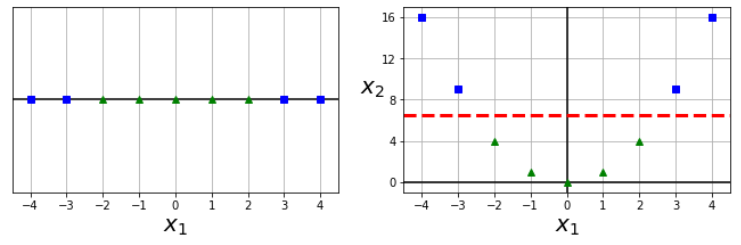

- 왼쪽 그림은 하나의 feature $x_1$만 가진 데이터 셋을 보여준다.
 - 이 데이터 셋은 하나의 선으로 분류 문제를 해결할 수 없다.

- 오른쪽 그림의 경우 $x_2 = x_1^2$로 두번째 feature를 추가한 데이터 셋을 보여준다.
 - 이 데이터 셋은 하나의 선으로 분류를 진행할 수 있다.

- 즉, 앞서 배운 **다항회귀** 때와 같은 방법으로 비선형 SVM을 해결할 수 있게 된다.

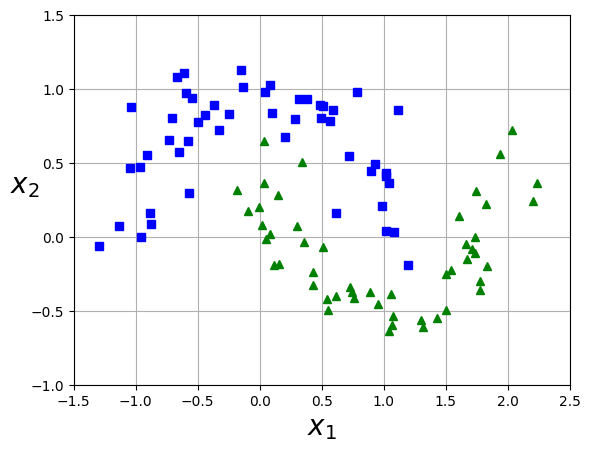

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=2023)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ################## Fill Your Code! ##################
        ("svm_clf", LinearSVC(C=10, random_state=2023))
        #####################################################
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, random_state=2023))])

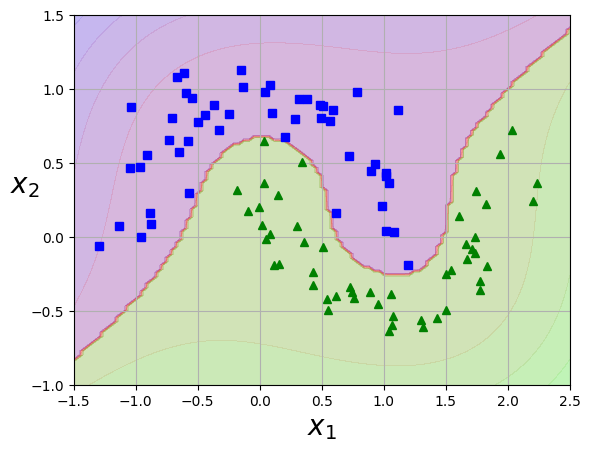

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show()

#### 3.2.1 커널 트릭

핸즈 온 머신러닝 p.211 ~

[추가 자료](https://datascienceschool.net/03%20machine%20learning/13.03%20%EC%BB%A4%EB%84%90%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0.html)

- 위와 같이 다항식 특성을 추가하는 SVM은 비선형 데이터 셋에 대하여 잘 작동하는 것을 확인하였다.
- 하지만, **낮은 차수**의 다항식은 매우 **복잡한 데이터셋**에는 **잘 작동하지 못한다.**
- 반대로, 너무 **높은 차수**의 다항식은 굉장히 **많은 특성**을 추가하기 때문에 **모델을 느려지게** 만든다.

위 문제를 해결해줄 방법은 **커널 트릭**을 사용하는 것이다.
- 커널 트릭은 실제로 다항식 feature을 넣지 않으면서, 마치 다항식 feature를 넣은 것처럼 작동하게 해준다.

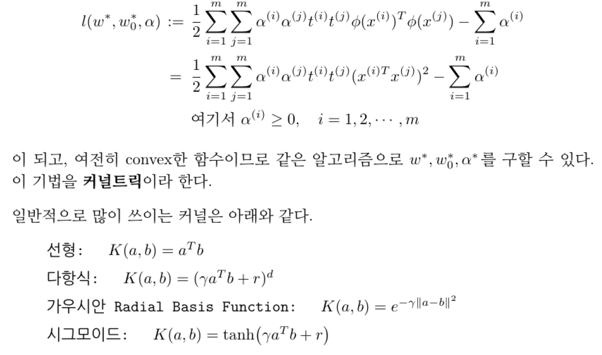

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ################## Fill Your Code! ##################
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
        #####################################################
    ])
poly_kernel_svm_clf.fit(X, y)

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ################## Fill Your Code! ##################
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
        #####################################################
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

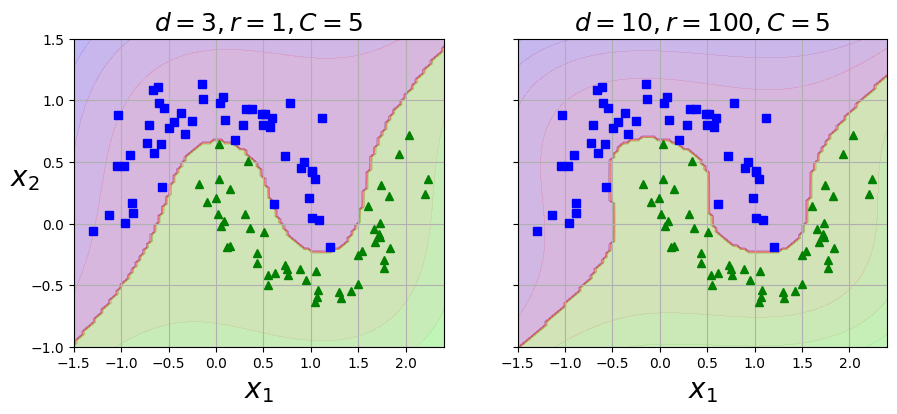

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

#save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

#### 3.2.2 온라인 SVM

핸즈 온 머신러닝 p.226 ~

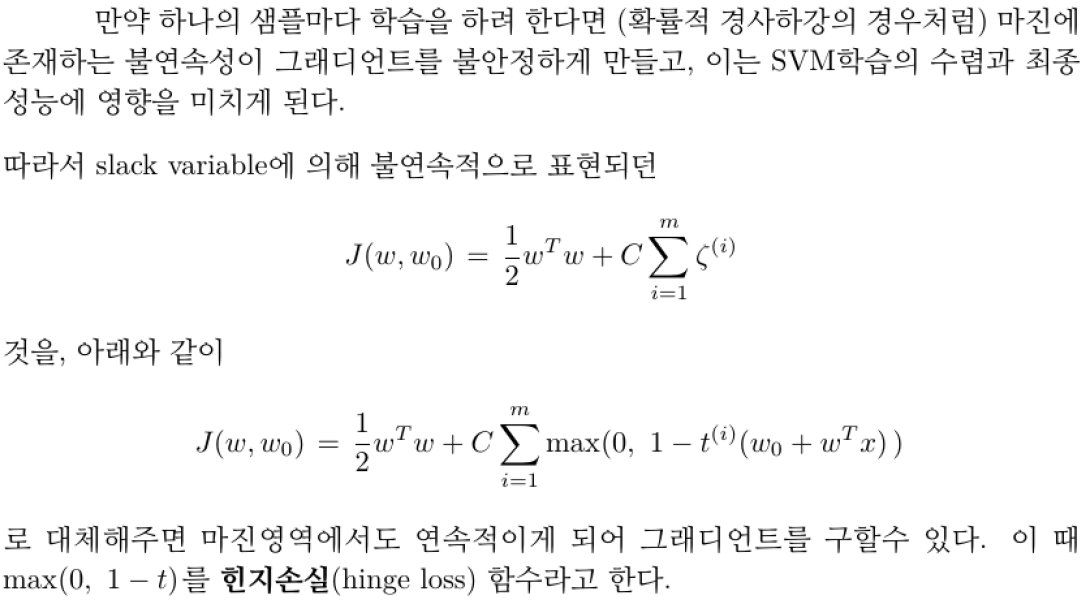

In [ ]:
class Linear_SVM_Classifier():
    def __init__(self, C=1):
        self.theta1n = None
        self.theta0 = None
        self.losses = []

        self.C = C

        self.intercept_ = None
        self.coef_ = None

        self.support_vectors_ = None

    def fit(self, x, y, epochs=10000, eta=0.001):
        self.theta1n = np.ones((x.shape[1], 1)) # (x.shape[1], 1)
        self.theta0 = 0

        m = len(x)
        t = y * 2 - 1 # t = -1 if y == 0, t = +1 if y == 1
        x_t = x * t # element-wise

        for _ in range(epochs):
            support_vectors_idx = (x_t.dot(self.theta1n) + t * self.theta0 < 1).ravel()
            x_t_sv = x_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            # 손실 값 계산
            loss = 1/2 * np.sum(self.theta1n * self.theta1n) + self.C * (np.sum(1 - x_t_sv.dot(self.theta1n)) - self.theta0 * np.sum(t_sv))
            self.losses.append(loss)

            # gradient 계산
            theta1n_grad = self.theta1n - self.C * np.sum(x_t_sv, axis=0).reshape(-1, 1)
            theta0_grad = -C * np.sum(t_sv)

            # 업데이트
            self.theta1n -= eta * theta1n_grad
            self.theta0 -= eta * theta0_grad

        self.intercept_ = np.array([self.theta0])
        self.coef_ = np.array([self.theta1n])

        support_vectors_idx = (x_t.dot(self.theta1n) + t * self.theta0 < 1).ravel()
        self.support_vectors_ = x[support_vectors_idx]

    def decision_function(self, x):
        return x.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, x):
        return (self.decision_function(x) >= 0).astype(np.float64)

In [ ]:
# 훈련 세트
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris virginica

[-15.298] [[[2.22013333]
  [2.71619822]]]
[-15.51721253] [[2.27128546 2.71287145]]


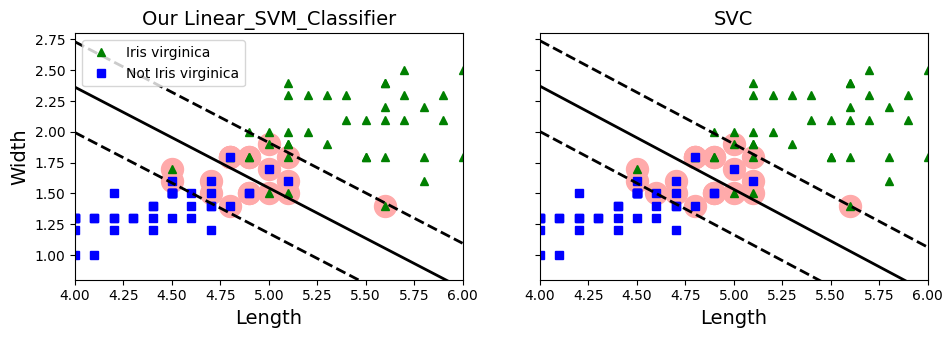

In [ ]:
C = 2
epochs = 30000
linear_svm_clf = Linear_SVM_Classifier(C=C)
linear_svm_clf.fit(X, y, epochs=epochs, eta=0.001)
print(linear_svm_clf.intercept_, linear_svm_clf.coef_)

yr = y.ravel()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(linear_svm_clf, 4, 6)
plt.xlabel("Length", fontsize=14)
plt.ylabel("Width", fontsize=14)
plt.title("Our Linear_SVM_Classifier", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")

svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Length", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8]);

(0.0, 30000.0, 0.0, 100.0)

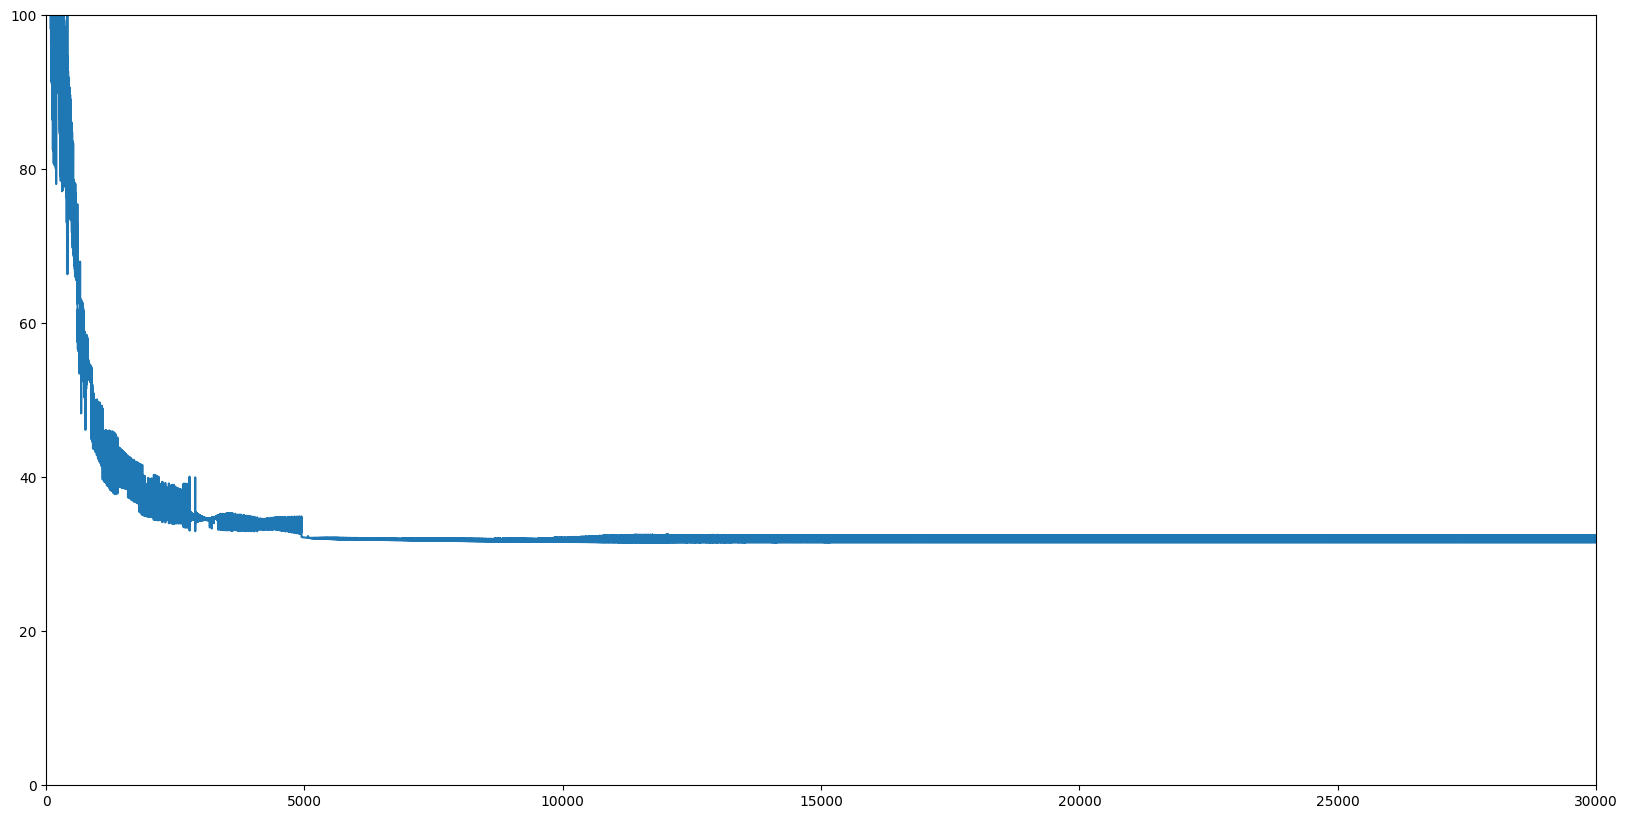

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(range(epochs), linear_svm_clf.losses)
plt.axis([0, epochs, 0, 100])